In [1]:
!pip install pyLDAvis
!pip install arabic_reshaper
!pip install python-bidi

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
import pandas as pd
import numpy as np
import re


df = pd.read_csv('/content/gdrive/MyDrive/Dataset(Colab)/UrduTopicModelling/urdu-news-dataset-1M.csv',encoding='utf-8')


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
df.head()

,Index,Headline,News Text,Category,Date,URL,Source,News length
0,0,عالمی بینک عسکریت پسندی سے متاثرہ خاندانوں کی ...,اسلام باد عالمی بینک خیبرپختونخوا کے قبائلی اض...,Business & Economics,12/6/2020,https://www.dawnnews.tv/news/1148499/,Dawn News,1854.0
1,1,مالی سال 2020 ریٹرن فائل کرنے والوں کی تعداد م...,اسلام باد فیڈرل بورڈ ریونیو ایف بی نے دسمبر کی...,Business & Economics,12/6/2020,https://www.dawnnews.tv/news/1148498/,Dawn News,2016.0
2,2,جاپان کو سندھ کے خصوصی اقتصادی زون میں سرمایہ ...,اسلام باد بورڈ انویسٹمنٹ بی او ئی کے چیئرمین ع...,Business & Economics,12/5/2020,https://www.dawnnews.tv/news/1148433/,Dawn News,2195.0
3,3,برامدات 767 فیصد بڑھ کر ارب 16 کروڑ ڈالر سے زائد,اسلام اباد پاکستان میں ماہ نومبر میں مسلسل تیس...,Business & Economics,12/5/2020,https://www.dawnnews.tv/news/1148430/,Dawn News,2349.0
4,4,کے الیکٹرک کو اضافی بجلی گیس کی فراہمی کے قانو...,اسلام باد نیشنل ٹرانسمیشن اینڈ ڈسپیچ کمپنی این...,Business & Economics,12/5/2020,https://www.dawnnews.tv/news/1148421/,Dawn News,2655.0


In [5]:
data_pre=df.drop(columns=['Index','Date','URL','Source','News length'])
data_pre.head()
# data_pre=data_pre.loc[df['Category'] == 'Business & Economics']

In [6]:
data_pre['News Text'] = \
data_pre['News Text'].map(lambda x: re.sub('[,\\.!?]', '', str(x)))
data_pre['News Text'].head()

0    اسلام باد عالمی بینک خیبرپختونخوا کے قبائلی اض...
1    اسلام باد فیڈرل بورڈ ریونیو ایف بی نے دسمبر کی...
2    اسلام باد بورڈ انویسٹمنٹ بی او ئی کے چیئرمین ع...
3    اسلام اباد پاکستان میں ماہ نومبر میں مسلسل تیس...
4    اسلام باد نیشنل ٹرانسمیشن اینڈ ڈسپیچ کمپنی این...
Name: News Text, dtype: object

In [9]:
import nltk
stopwords=pd.read_csv('/content/gdrive/MyDrive/Dataset(Colab)/UrduTopicModelling/stopwords_updated.txt',names=['List'])
# stopwords['List']

stopwords_ur=[]
for li in stopwords['List']:
  stopwords_ur.append(li)
print(len(stopwords_ur))

907


In [10]:
import gensim
from gensim.utils import simple_preprocess
def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

In [12]:
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stopwords_ur] for doc in texts]

In [13]:
data = data_pre['News Text'].values.tolist()
print((data[19]))

ممبئی بھارت کی معیشت جولائی اور ستمبر کے دوران 75 فیصد سکڑنے سے بدترین کارکردگی کا مظاہرہ کرنے والی بڑی ترقی یافتہ اور ابھرتی ہوئی معیشتوں میں شامل ہوگئی کیونکہ یہ ازادی کے بعد پہلی مرتبہ تکنیکی کساد بازاری میں داخل ہوئی ہےڈان اخبار میں شائع فرانسیسی خبررساں ادارے اے ایف پی کی رپورٹ میں بتایا گیا کہ سرکاری اعداد شمار ظاہر کرتے ہیں کہ معیشت کساد بازاری میں داخل ہوگئی ہےاگرچہ گزشتہ سہ ماہی میں ریکارڈ 239 فیصد سکڑنے کے مقابلے میں اعداد شمار میں بہتری تھی تاہم یہ اس طرف اشارہ کرتے ہیں کہ ایشیا کی تیسری بڑی معیشت سخت مقابلہ کر رہی ہے کیونکہ یہ طلب کو بحال کرنے اور روزگار پیدا کرنے کی کوششوں میں ہے جبکہ کورونا وائرس کا انفیکشن بڑھ رہا ہےمزید پڑھیں بھارت میں کورونا کی ابتر صورتحال ایک دن میں 90 ہزار سے زائد کیسز رپورٹتاہم مسلسل سہ ماہیوں میں معیشت کے سکڑنے کا مطلب ہے کہ ملک 1947 کے بعد سے پہلی مرتبہ تکنیکی کساد بزاری میں داخل ہوگیا ہےوائرس سے متعلق لاک ڈانز سے ہونے والی عالمی تباہی کے بعد امریکا جاپان اور جرمنی سمیت بڑی معیشتوں کی جانب سے 30 ستمبر کو ختم ہونے والی سہ ماہی میں ریکارڈ کی گئی تر

In [14]:
data_words = list(sent_to_words(data))
# print((data_words))

In [15]:
data_words = remove_stopwords(data_words)
# print(data_words)

In [16]:
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(data_words)
print(id2word)
count = 0
for k, v in id2word.iteritems():
    print(k, v)
    count += 1
    if count > 10:
        break

# Create Corpus
texts = data_words

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
# a,b=corpus[0][0]
# print(a,b)

# [[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

Dictionary(84259 unique tokens: ['اجرا', 'اخبار', 'اداروں', 'اسلام', 'اسمعیل']...)
0 اجرا
1 اخبار
2 اداروں
3 اسلام
4 اسمعیل
5 اضافی
6 اضافے
7 اضلاع
8 امکان
9 انضمام
10 ای


In [24]:
num_topics=2
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=num_topics, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt

In [25]:
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.012*"پاکستان" + 0.009*"ٹیکس" + 0.009*"ایف" + 0.007*"حکومت" + 0.006*"ارب" + 0.006*"بی" + 0.005*"جايے" + 0.005*"ایم" + 0.005*"مطابق" + 0.004*"پی"
Topic: 1 
Words: 0.056*"روپے" + 0.028*"قیمت" + 0.027*"ڈالر" + 0.016*"اضافہ" + 0.015*"مارکیٹ" + 0.013*"فیصد" + 0.013*"سونے" + 0.011*"پیسے" + 0.011*"ارب" + 0.011*"ہزار"


In [27]:
import pyLDAvis
import pickle 
import pyLDAvis.gensim_models
pyLDAvis.enable_notebook()
vis=pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word, mds="mmds", R=30)
vis

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted t

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.010797 -0.190548       1        1  72.028193
1      0.010797  0.190548       2        1  27.971807, topic_info=         Term          Freq         Total Category  logprob  loglift
185      روپے  57037.000000  57037.000000  Default  30.0000  30.0000
638      قیمت  23932.000000  23932.000000  Default  29.0000  29.0000
132      ڈالر  26641.000000  26641.000000  Default  28.0000  28.0000
883    مارکیٹ  12795.000000  12795.000000  Default  27.0000  27.0000
154     اضافہ  15633.000000  15633.000000  Default  26.0000  26.0000
...       ...           ...           ...      ...      ...      ...
106     مطابق   6804.745350  16886.978658   Topic2  -4.8467   0.3651
57        سال   5721.856308  15291.006515   Topic2  -5.0200   0.2910
26       بینک   5127.905279  14586.128229   Topic2  -5.1296   0.2286
3209     فوٹو   4513.889528  14033.937379   Topic2  -5.2571   0.1397
125   پاکستان   4575.555386  31548.809954   Topic2  -5.2436  -0.6568

[154 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
480       1  0.999930  اجلاس
480       2  0.000172  اجلاس
1245      1  0.999891     ار
1245      2  0.000114     ار
152       1  0.590002    ارب
...     ...       ...    ...
252       2  0.160217   ہويے
1007      1  0.003187   ہوکر
1007      2  0.996743   ہوکر
934       1  0.082568  ہوگيی
934       2  0.917470  ہوگيی

[216 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2])

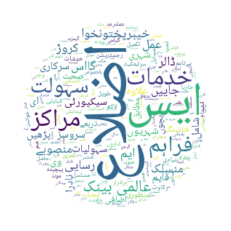

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from bidi.algorithm import get_display
from arabic_reshaper import ArabicReshaper

long_string = ','.join(list(data_words[0]))


configuration = {"language": "Urdu"}

reshaper = ArabicReshaper(configuration=configuration)

text = reshaper.reshape(long_string)
text = get_display(text)


x, y = np.ogrid[:300, :300]

mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
mask = 255 * mask.astype(int)


wc = WordCloud(background_color="white",font_path='/content/gdrive/MyDrive/Dataset(Colab)/UrduTopicModelling/NotoNaskhArabic-Regular.ttf', repeat=True, mask=mask)
wc.generate(text)

plt.axis("off")
plt.imshow(wc, interpolation="bilinear")